In [ ]:
# Классификация на реальных данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
y = data.Outcome
X = data.drop('Outcome', axis=1)

In [6]:
y.shape, X.shape

((768,), (768, 8))

In [7]:
from sklearn.linear_model import LogisticRegression

In [9]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [12]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
 -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]


In [15]:
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.123
Glucose 0.035
BloodPressure -0.013
SkinThickness 0.001
Insulin -0.001
BMI 0.090
DiabetesPedigreeFunction 0.868
Age 0.015


In [16]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-8.36507758]


In [17]:
y_pred = logistic.predict(X)

In [18]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [20]:
from sklearn import metrics

In [21]:
metrics.confusion_matrix(y, y_pred)

array([[444,  56],
       [112, 156]])

In [23]:
import seaborn as sns

<Axes: >

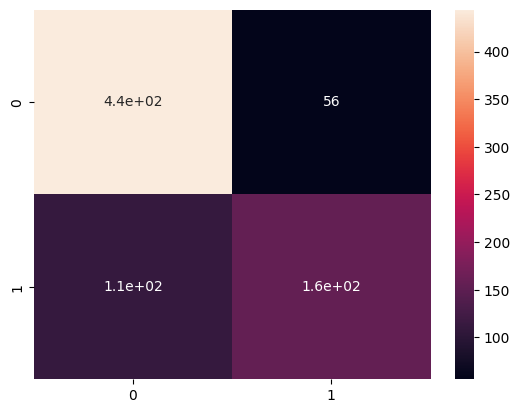

In [24]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [25]:
logistic.score(X, y)

0.78125

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures(2)

In [28]:
X_poly = poly.fit_transform(X)
X_poly.shape

(768, 45)

In [29]:
polynomial = LogisticRegression(max_iter=1000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)
# Дополнительные признаки не оправдали себя

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
polynomial.score(X_poly, y)

0.7890625

In [ ]:
# # Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
# Метод опорных векторов
# Без ядра
# С линейным ядром
# С гауссовым ядром
# С полиномиальным ядром
# Метод ближайших соседей
# Многослойный перцептрон
# Дерево решений
# Наивный байесовский классификатор
# (*) Другие методы:
# Пассивно-агрессивный классификатор
# Гребневый классификатор
# Случайный лес
# Беггинг
# Другие модели по желанию
# Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.


LogisticRegression:
Intercept: [-8.36507758]
Coefficients: [[ 1.22505160e-01  3.51099563e-02 -1.32987359e-02  7.78690277e-04
  -1.17362787e-03  8.96527929e-02  8.67790286e-01  1.49830228e-02]]

LogisticRegression - Accuracy: 0.7812
Confusion Matrix:
[[444  56]
 [112 156]]


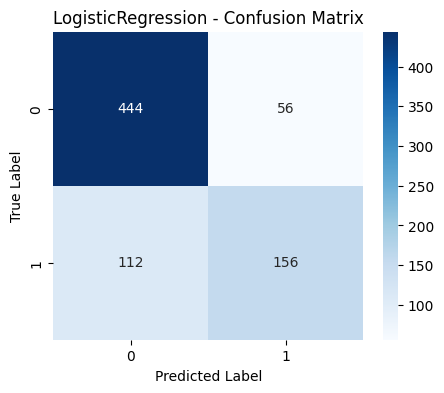


LinearSVC - Accuracy: 0.7799
Confusion Matrix:
[[446  54]
 [115 153]]


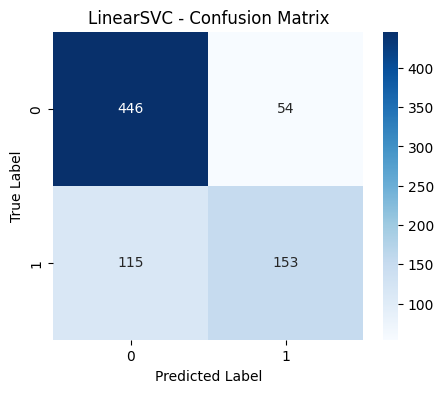


KNeighbors - Accuracy: 0.8034
Confusion Matrix:
[[442  58]
 [ 93 175]]


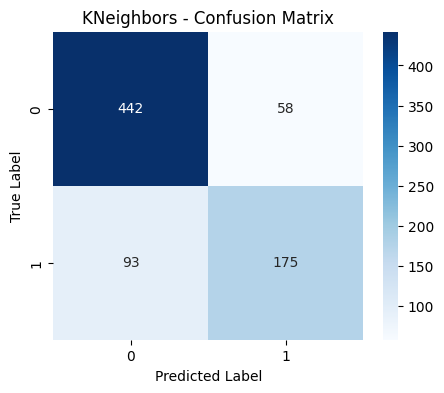


DecisionTree - Accuracy: 1.0000
Confusion Matrix:
[[500   0]
 [  0 268]]


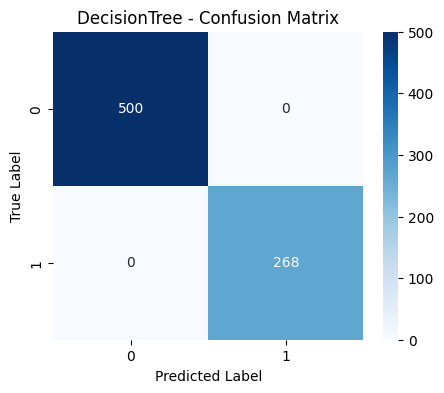


GaussianNB - Accuracy: 0.7630
Confusion Matrix:
[[421  79]
 [103 165]]


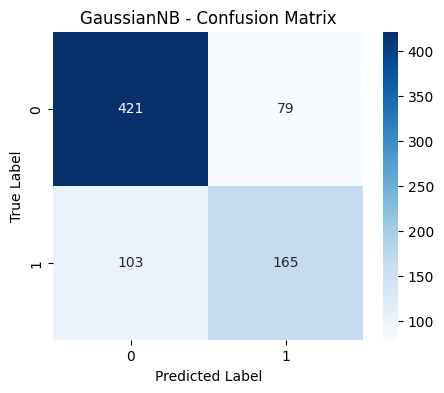


PassiveAggressive - Accuracy: 0.4609
Confusion Matrix:
[[204 296]
 [118 150]]


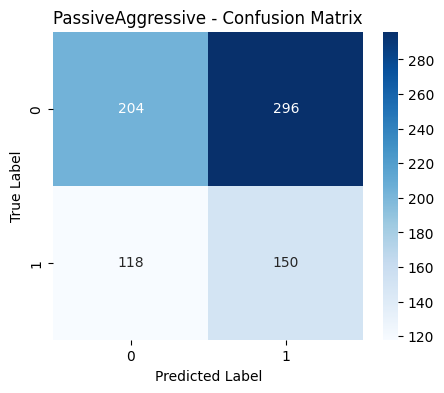


RidgeClassifier - Accuracy: 0.7826
Confusion Matrix:
[[447  53]
 [114 154]]


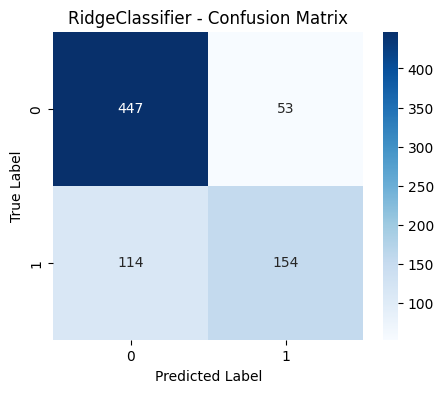


RandomForest - Accuracy: 1.0000
Confusion Matrix:
[[500   0]
 [  0 268]]


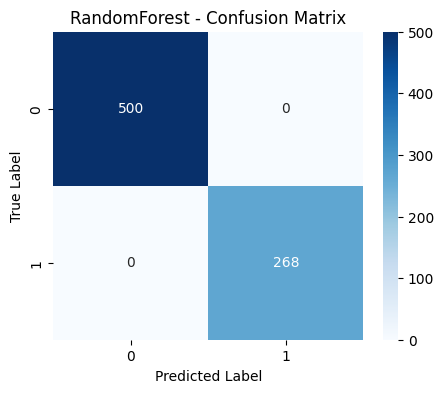


Bagging - Accuracy: 0.9857
Confusion Matrix:
[[497   3]
 [  8 260]]


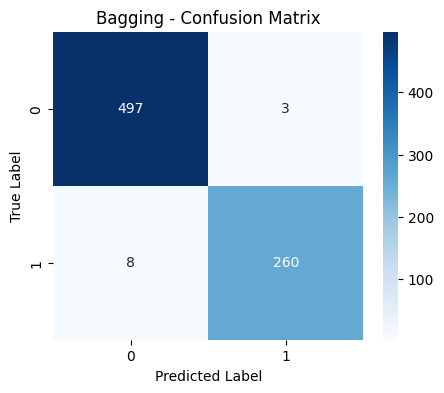


Сводная таблица результатов:
                Model  Accuracy
0  LogisticRegression  0.781250
1           LinearSVC  0.779948
2          KNeighbors  0.803385
3        DecisionTree  1.000000
4          GaussianNB  0.763021
5   PassiveAggressive  0.460938
6     RidgeClassifier  0.782552
7        RandomForest  1.000000
8             Bagging  0.985677


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

def evaluate_classifiers_full(X, y):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "LinearSVC": LinearSVC(max_iter=10000, random_state=42),
        # "SVC_linear": SVC(kernel="linear", probability=True, random_state=42),
        # "SVC_rbf": SVC(kernel="rbf", probability=True, random_state=42),
        # "SVC_poly": SVC(kernel="poly", probability=True, random_state=42),
        "KNeighbors": KNeighborsClassifier(),
        # "MLPClassifier": MLPClassifier(max_iter=1000, random_state=42),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
        "PassiveAggressive": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
        "RidgeClassifier": RidgeClassifier(),
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Bagging": BaggingClassifier(n_estimators=10, random_state=42)
    }
    
    results = []
    
    for name, clf in models.items():
        clf.fit(X, y)
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)
        cm = confusion_matrix(y, y_pred)
        
        # Если это LogisticRegression, выводим дополнительные параметры
        if name == "LogisticRegression":
            print(f"\n{name}:")
            print("Intercept:", clf.intercept_)
            print("Coefficients:", clf.coef_)
        
        print(f"\n{name} - Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)
        
        results.append({"Model": name, "Accuracy": acc})
        
        # Визуализация с помощью seaborn heatmap
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.title(f"{name} - Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
    
    results_df = pd.DataFrame(results)
    print("\nСводная таблица результатов:")
    print(results_df)

evaluate_classifiers_full(X, y)

In [37]:
# Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

from sklearn.datasets import load_iris

iris = load_iris()

# Преобразование массива признаков в DataFrame с нужными именами столбцов
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Преобразование массива меток в Series
y = pd.Series(iris.target, name="species")

print(X.head())
print(X.info())
print(X.describe())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

In [38]:
y.shape, X.shape

((150,), (150, 4))

In [39]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [40]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [-0.4248362   0.96741615 -2.51536487 -1.08235714]


In [41]:
_ = [print(k, f"{v:.3f}") for k, v in zip(X.columns, logistic.coef_[0])]

sepal length (cm) -0.425
sepal width (cm) 0.967
petal length (cm) -2.515
petal width (cm) -1.082


In [42]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [  9.85393186   2.23224793 -12.08617979]


In [43]:
y_pred = logistic.predict(X)

In [44]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [45]:
from sklearn import metrics

In [46]:
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [47]:
import seaborn as sns

<Axes: >

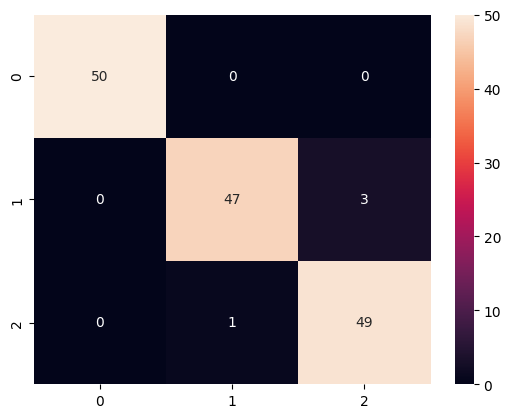

In [48]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [49]:
logistic.score(X, y)

0.9733333333333334

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly.shape

(150, 15)

In [53]:
polynomial = LogisticRegression(max_iter=1000)
polynomial.fit(X_poly, y)
y_pred_poly = polynomial.predict(X_poly)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
polynomial.score(X_poly, y)

0.98